### I: DataCollection


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jillanisofttech/updated-resume-dataset")

print("Path to dataset files:", path)

100%|██████████| 383k/383k [00:00<00:00, 838kB/s]

Extracting files...
Path to dataset files: C:\Users\Évi\.cache\kagglehub\datasets\jillanisofttech\updated-resume-dataset\versions\1


In [2]:
import pandas as pd
import numpy as np

resume_df = pd.read_csv('UpdatedResumeDataSet.csv' ,encoding='utf-8')
resume_df['Cleaned_Resume'] = ''
resume_df

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,
958,Testing,â Willingness to accept the challenges. â ...,
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,


In [2]:
resume_df.describe().T

,count,unique,top,freq
Category,962,25,Java Developer,84
Resume,962,166,"Technical Skills Web Technologies: Angular JS,...",18
Cleaned_Resume,962,1,,962


In [3]:
resume_df.info(verbose=True) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Resume          962 non-null    object
 2   Cleaned_Resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


In [4]:
resume_df['Category'].value_counts().reset_index()

,Category,count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


In [5]:
resume_df.isnull().sum()

Category          0
Resume            0
Cleaned_Resume    0
dtype: int64

In [6]:
resume_df.values

array([['Data Science',
        'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\n

In [7]:
# Regular expressions
import re

def cleanResume(resumeText):
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # punctuations
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # URL
    resumeText = re.sub('RT|cc', ' ', resumeText)  # RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # hashtag
    resumeText = re.sub('@\S+', '  ', resumeText)  # mentions
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # whitespace

    return resumeText


resume_df['Cleaned_Resume'] = resume_df.Resume.apply(lambda x: cleanResume(x))

resume_df['Cleaned_Resume'].values
resume_df

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [8]:
resume_df['Length'] = resume_df['Resume'].apply(len)
resume_df['Cleaned_Length'] = resume_df['Cleaned_Resume'].apply(len)
resume_df

,Category,Resume,Cleaned_Resume,Length,Cleaned_Length
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,4786,4517
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,1268,1130
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,1871,1780
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6995,6472
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,452,404
...,...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...,2130,1926
958,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...,2306,2119
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...,3319,2900
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...,767,705


In [9]:
max_length = resume_df['Cleaned_Length'].max()

leghosszabb = resume_df[resume_df['Cleaned_Length']== max_length]
leghosszabb.values
leghosszabb

,Category,Resume,Cleaned_Resume,Length,Cleaned_Length
514,Operations Manager,Education Details \r\nAugust 2000 B.E Electron...,Education Details August 2000 B E Electronics ...,14816,13631
518,Operations Manager,Education Details \r\nAugust 2000 B.E Electron...,Education Details August 2000 B E Electronics ...,14816,13631
522,Operations Manager,Education Details \r\nAugust 2000 B.E Electron...,Education Details August 2000 B E Electronics ...,14816,13631
526,Operations Manager,Education Details \r\nAugust 2000 B.E Electron...,Education Details August 2000 B E Electronics ...,14816,13631
530,Operations Manager,Education Details \r\nAugust 2000 B.E Electron...,Education Details August 2000 B E Electronics ...,14816,13631
534,Operations Manager,Education Details \r\nAugust 2000 B.E Electron...,Education Details August 2000 B E Electronics ...,14816,13631
538,Operations Manager,Education Details \r\nAugust 2000 B.E Electron...,Education Details August 2000 B E Electronics ...,14816,13631
542,Operations Manager,Education Details \r\nAugust 2000 B.E Electron...,Education Details August 2000 B E Electronics ...,14816,13631
546,Operations Manager,Education Details \r\nAugust 2000 B.E Electron...,Education Details August 2000 B E Electronics ...,14816,13631
550,Operations Manager,Education Details \r\nAugust 2000 B.E Electron...,Education Details August 2000 B E Electronics ...,14816,13631


In [10]:
corpus = ' '.join(resume_df["Cleaned_Resume"][i] for i in range(resume_df.shape[0]))
corpus[0:6500]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [11]:
len(corpus)

2806232

In [12]:
# Tokenizer, stopwords, lemmatizer

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

import nltk
from nltk.corpus import stopwords 

stopwords = nltk.corpus.stopwords.words('english')
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

tokens = tokenizer.tokenize(corpus)
new_tokens= [token.lower() for token in tokens if token.lower() not in stopwords]
new_tokens


['skills',
 'programming',
 'languages',
 'python',
 'pandas',
 'numpy',
 'scipy',
 'scikit',
 'learn',
 'matplotlib',
 'sql',
 'java',
 'javascript',
 'jquery',
 'machine',
 'learning',
 'regression',
 'svm',
 'na',
 'bayes',
 'knn',
 'random',
 'forest',
 'decision',
 'trees',
 'boosting',
 'techniques',
 'cluster',
 'analysis',
 'word',
 'embedding',
 'sentiment',
 'analysis',
 'natural',
 'language',
 'processing',
 'dimensionality',
 'reduction',
 'topic',
 'modelling',
 'lda',
 'nmf',
 'pca',
 'neural',
 'nets',
 'database',
 'visualizations',
 'mysql',
 'sqlserver',
 'cassandra',
 'hbase',
 'elasticsearch',
 'd3',
 'js',
 'dc',
 'js',
 'plotly',
 'kibana',
 'matplotlib',
 'ggplot',
 'tableau',
 'others',
 'regular',
 'expression',
 'html',
 'css',
 'angular',
 '6',
 'logstash',
 'kafka',
 'python',
 'flask',
 'git',
 'docker',
 'computer',
 'vision',
 'open',
 'cv',
 'understanding',
 'deep',
 'learning',
 'education',
 'details',
 'data',
 'science',
 'assurance',
 'associate',

In [13]:
len(new_tokens)

318960

In [14]:
from nltk.stem import WordNetLemmatizer 

wordnet = WordNetLemmatizer() 

lemmas= [wordnet.lemmatize(token) for token in new_tokens]
lemmas


['skill',
 'programming',
 'language',
 'python',
 'panda',
 'numpy',
 'scipy',
 'scikit',
 'learn',
 'matplotlib',
 'sql',
 'java',
 'javascript',
 'jquery',
 'machine',
 'learning',
 'regression',
 'svm',
 'na',
 'bayes',
 'knn',
 'random',
 'forest',
 'decision',
 'tree',
 'boosting',
 'technique',
 'cluster',
 'analysis',
 'word',
 'embedding',
 'sentiment',
 'analysis',
 'natural',
 'language',
 'processing',
 'dimensionality',
 'reduction',
 'topic',
 'modelling',
 'lda',
 'nmf',
 'pca',
 'neural',
 'net',
 'database',
 'visualization',
 'mysql',
 'sqlserver',
 'cassandra',
 'hbase',
 'elasticsearch',
 'd3',
 'j',
 'dc',
 'j',
 'plotly',
 'kibana',
 'matplotlib',
 'ggplot',
 'tableau',
 'others',
 'regular',
 'expression',
 'html',
 'cs',
 'angular',
 '6',
 'logstash',
 'kafka',
 'python',
 'flask',
 'git',
 'docker',
 'computer',
 'vision',
 'open',
 'cv',
 'understanding',
 'deep',
 'learning',
 'education',
 'detail',
 'data',
 'science',
 'assurance',
 'associate',
 'data',
 

In [15]:
len(lemmas)

318960

In [16]:
not_lemmatized  = sum(1 for i in range(len(new_tokens)) if lemmas[i] in new_tokens[i])
lemmatized  = sum(1 for i in range(len(new_tokens)) if lemmas[i] not in new_tokens[i])

print(f'Nem lemmatizált szavak: {not_lemmatized} ')
print(f'Lemmatizált szavak: {lemmatized} ')

all = [not_lemmatized+lemmatized]
print("Összes",*all)


Nem lemmatizált szavak: 314492 
Lemmatizált szavak: 4468 
Összes 318960


### II: DataMining

In [17]:
from nltk import FreqDist
import string
import matplotlib.pyplot as plt
%matplotlib inline

def szogyakorisag(lemmas):
    szo_gyak = FreqDist(lemmas)
    dict = [print(key, value) for key, value in sorted(szo_gyak.items(), key=lambda item: item[1], reverse=True)]

    return dict


print(szogyakorisag(lemmas))

project 4071
exprience 3829
company 3639
month 3344
detail 3132
description 3122
1 2162
team 2159
data 2156
skill 2067
management 2024
system 1954
database 1533
6 1499
year 1499
client 1472
maharashtra 1449
application 1394
service 1380
technology 1370
testing 1349
test 1297
requirement 1274
business 1273
report 1240
development 1204
developer 1200
server 1196
customer 1182
ltd 1177
process 1166
less 1145
responsibility 1137
using 1124
sql 1120
january 1090
java 1076
engineering 1055
work 1038
pune 1026
role 969
c 951
user 916
software 901
operation 895
pvt 879
education 857
sale 845
activity 832
environment 800
design 786
2 776
technical 767
india 762
university 762
engineer 759
monthscompany 746
working 745
various 727
issue 722
job 709
web 702
manager 699
python 697
tool 695
college 695
time 675
solution 655
automation 645
like 640
window 638
support 633
product 629
quality 625
mysql 616
based 608
e 606
worked 604
per 601
knowledge 597
training 591
3 589
document 576
used 568
comput

In [18]:
szo_gyak = FreqDist(lemmas)
szo_gyak_df = pd.DataFrame(szo_gyak.items(), columns=["Word", "Frequency"])
szo_gyak_df = szo_gyak_df[~szo_gyak_df["Word"].apply(lambda x: any(char.isdigit() for char in x))]

# Plot
top = 50
plt.figure(figsize=(15, 8))
szo_gyak_df = szo_gyak_df.sort_values(by="Frequency", ascending=False).head(top)
szo_gyak_df


,Word,Frequency
172,project,4071
84,exprience,3829
88,company,3639
86,month,3344
76,detail,3132
89,description,3122
107,team,2159
77,data,2156
0,skill,2067
498,management,2024


<Figure size 1500x800 with 0 Axes>

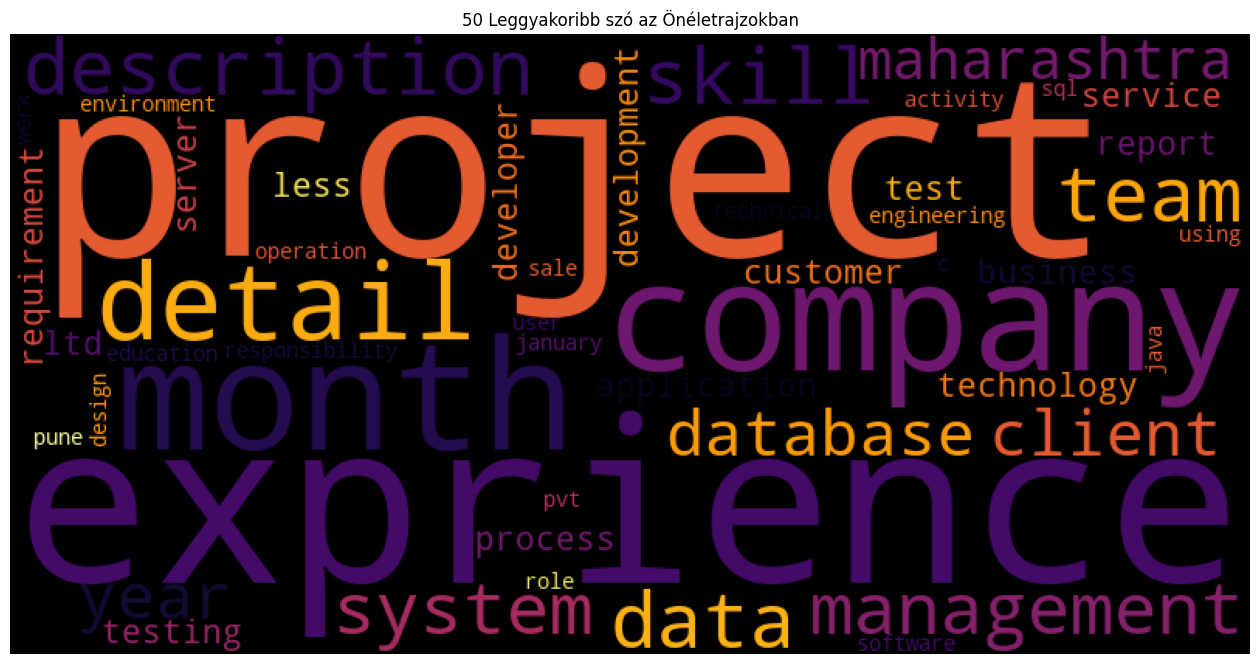

In [19]:
from wordcloud import WordCloud 

szo_gyak_df = szo_gyak_df.sort_values(by="Frequency", ascending=False)
top_words =' '.join([szo for szo in szo_gyak_df.head(200)['Word'] if not szo.isdigit()])

#Plot
plt.subplots(figsize=(16,10))
szo_felho = WordCloud(max_words=200, background_color='black', colormap='inferno', contour_color='blue', contour_width=1, width=800, height=400).generate(top_words)
plt.title('50 Leggyakoribb szó az Önéletrajzokban')
plt.axis('off')
plt.imshow(szo_felho)

In [20]:
def analysis_resumes_with_keyword(keyword):
    results = {}
    
    for category in resume_df["Category"].unique():
        filtered_df = resume_df[resume_df["Category"] == category]
        indices_with_keyword = filtered_df[filtered_df["Cleaned_Resume"].str.contains(keyword, case=False, na=False)].index.tolist()
        results[category] = indices_with_keyword
    
    return results

keyword = "manager"  #pandas, jupyter, network, neural, excel, sql, sap
keyword_indices = analysis_resumes_with_keyword(keyword) 
for category, indices in keyword_indices.items():
    if indices:
        print(f"Önéletrajzok indexei, melyek tartalmazzák a {keyword} kulcsszót ebben a kategóriában: {category}: {indices}")
    else:
        print(f"Egyik önéletrajz sem tartalmazza ezt a kulcsszót: '{keyword}' ebben a kategóriában: {category}.")

Önéletrajzok indexei, melyek tartalmazzák a manager kulcsszót ebben a kategóriában: Data Science: [0, 10, 20, 30]
Egyik önéletrajz sem tartalmazza ezt a kulcsszót: 'manager' ebben a kategóriában: HR.
Egyik önéletrajz sem tartalmazza ezt a kulcsszót: 'manager' ebben a kategóriában: Advocate.
Önéletrajzok indexei, melyek tartalmazzák a manager kulcsszót ebben a kategóriában: Arts: [106, 112, 118, 124, 130, 136]
Egyik önéletrajz sem tartalmazza ezt a kulcsszót: 'manager' ebben a kategóriában: Web Designing.
Önéletrajzok indexei, melyek tartalmazzák a manager kulcsszót ebben a kategóriában: Mechanical Engineer: [185, 190, 195, 200, 205, 210, 215, 220]
Önéletrajzok indexei, melyek tartalmazzák a manager kulcsszót ebben a kategóriában: Sales: [225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264]
Önéletrajzok indexei, melyek tartalmazzák a manager 

In [21]:
from nltk.corpus import wordnet as wn

def analysis_with_synonyms(keyword):
    
    synsets = wn.synsets(keyword)
    synonyms = set()
    
    for synset in synsets:
        synonyms.update(synset.lemma_names())

    print(f"Keyword: {keyword}")
    print(f"Synonyms: {', '.join(synonyms)}\n")

    results = {}

    for category in resume_df["Category"].unique():
        filtered_df = resume_df[resume_df["Category"] == category]
        indices_with_synonyms = filtered_df[filtered_df["Cleaned_Resume"].str.contains("|".join(synonyms), case=False, na=False)].index.tolist()
        results[category] = indices_with_synonyms

    return results


keyword = 'testing'
keyword_results = analysis_with_synonyms(keyword)

for category, indices in keyword_results.items():
    if indices:
        print(f"Önéletrajzok indexei, melyek tartalmazzák a {keyword} kulcsszót ebben a kategóriában: {category}: {indices}")
    else:
        print(f"Egyik önéletrajz sem tartalmazza ezt a kulcsszót: '{keyword}' vagy a szinonimáit ebben a kategóriában: {category}.")


Keyword: testing
Synonyms: test, essay, try_out, examine, screen, testing, try, prove, quiz, examination

Önéletrajzok indexei, melyek tartalmazzák a testing kulcsszót ebben a kategóriában: Data Science: [2, 3, 9, 12, 13, 19, 22, 23, 29, 32, 33, 39]
Önéletrajzok indexei, melyek tartalmazzák a testing kulcsszót ebben a kategóriában: HR: [41, 52, 63, 74]
Önéletrajzok indexei, melyek tartalmazzák a testing kulcsszót ebben a kategóriában: Advocate: [88, 98]
Önéletrajzok indexei, melyek tartalmazzák a testing kulcsszót ebben a kategóriában: Arts: [105, 106, 109, 111, 112, 115, 117, 118, 121, 123, 124, 127, 129, 130, 133, 135, 136, 139]
Egyik önéletrajz sem tartalmazza ezt a kulcsszót: 'testing' vagy a szinonimáit ebben a kategóriában: Web Designing.
Önéletrajzok indexei, melyek tartalmazzák a testing kulcsszót ebben a kategóriában: Mechanical Engineer: [185, 186, 187, 189, 190, 191, 192, 194, 195, 196, 197, 199, 200, 201, 202, 204, 205, 206, 207, 209, 210, 211, 212, 214, 215, 216, 217, 219,

In [22]:
def analysis_with_synonyms_and_hyponyms(keyword):
    synsets = wn.synsets(keyword)
    synonyms = set()
    hyponyms = set()
    
    for synset in synsets:
        synonyms.update(synset.lemma_names())
        for hyponym in synset.hyponyms():
            hyponyms.update(hyponym.lemma_names())
    
    related_words = synonyms.union(hyponyms)
    print(f"Szinonimák: {synonyms}")
    print(f"Hiponimák: {hyponyms}")
    print(f"Összes kapcsolódó szó: {related_words}")
    
    results = {}
    for category in resume_df["Category"].unique():
        filtered_df = resume_df[resume_df["Category"] == category]
        indices_with_related_words = filtered_df[filtered_df["Cleaned_Resume"].str.contains( '|'.join(related_words), case=False, na=False)].index.tolist()
        results[category] = indices_with_related_words
    
    return results

keyword = "testing"
keyword_results = analysis_with_synonyms_and_hyponyms(keyword)

for category, indices in keyword_results.items():
    if indices:
        print(f"Önéletrajzok, melyek tartalmazzák ezt a szót: '{keyword}' vagy a szinonimáit/hiponimáit ebben a kategóriában: {category}: {indices}")
    else:
        print(f"Egyik önéletrajz sem tartalmazza ezt a kulcsszót: '{keyword}' vagy a szinonimáit/hiponimáit ebben a kategóriában: {category}.")


Szinonimák: {'test', 'essay', 'try_out', 'examine', 'screen', 'testing', 'try', 'prove', 'quiz', 'examination'}
Hiponimák: {'control', 'eleven-plus', 'screening', 'field-test', '11-plus', 'verify', 'float'}
Összes kapcsolódó szó: {'test', 'control', 'essay', 'try_out', 'examine', 'screen', 'eleven-plus', 'testing', 'try', 'prove', 'screening', 'quiz', 'field-test', '11-plus', 'verify', 'float', 'examination'}
Önéletrajzok, melyek tartalmazzák ezt a szót: 'testing' vagy a szinonimáit/hiponimáit ebben a kategóriában: Data Science: [2, 3, 9, 12, 13, 19, 22, 23, 29, 32, 33, 39]
Önéletrajzok, melyek tartalmazzák ezt a szót: 'testing' vagy a szinonimáit/hiponimáit ebben a kategóriában: HR: [41, 52, 63, 74]
Önéletrajzok, melyek tartalmazzák ezt a szót: 'testing' vagy a szinonimáit/hiponimáit ebben a kategóriában: Advocate: [88, 89, 98, 99]
Önéletrajzok, melyek tartalmazzák ezt a szót: 'testing' vagy a szinonimáit/hiponimáit ebben a kategóriában: Arts: [105, 106, 109, 111, 112, 115, 117, 118, 

### III: DataAnalysis

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(stop_words='english', max_features=1000)
szozsak = vectorizer.fit_transform(lemmas)
print(lemmas[1:100])

lda = LatentDirichletAllocation(n_components=2, random_state=0)
lda.fit(szozsak)

lda_matrix= lda.transform(szozsak) 
print(lda_matrix)

for topic_idx, topic in enumerate(lda.components_):
    print(f"Téma {topic_idx}:")
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))

['programming', 'language', 'python', 'panda', 'numpy', 'scipy', 'scikit', 'learn', 'matplotlib', 'sql', 'java', 'javascript', 'jquery', 'machine', 'learning', 'regression', 'svm', 'na', 'bayes', 'knn', 'random', 'forest', 'decision', 'tree', 'boosting', 'technique', 'cluster', 'analysis', 'word', 'embedding', 'sentiment', 'analysis', 'natural', 'language', 'processing', 'dimensionality', 'reduction', 'topic', 'modelling', 'lda', 'nmf', 'pca', 'neural', 'net', 'database', 'visualization', 'mysql', 'sqlserver', 'cassandra', 'hbase', 'elasticsearch', 'd3', 'j', 'dc', 'j', 'plotly', 'kibana', 'matplotlib', 'ggplot', 'tableau', 'others', 'regular', 'expression', 'html', 'cs', 'angular', '6', 'logstash', 'kafka', 'python', 'flask', 'git', 'docker', 'computer', 'vision', 'open', 'cv', 'understanding', 'deep', 'learning', 'education', 'detail', 'data', 'science', 'assurance', 'associate', 'data', 'science', 'assurance', 'associate', 'ernst', 'young', 'llp', 'skill', 'detail', 'javascript', 'e

In [24]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


resume_texts = resume_df['Cleaned_Resume']
job_description = """
We are looking for a Data Scientist with experience in Python, machine learning, data visualization,
and strong knowledge of statistics and mathematics. Proficiency in tools like pandas, NumPy, scikit-learn,
and experience with neural networks is a plus. Knowledge of a foreign language is an advantage.
"""

tf = TfidfVectorizer(stop_words='english', max_features=1000)
resume_matrix = tf.fit_transform(resume_texts)

job_description_vector = tf.transform([job_description])

cos_similarity = linear_kernel(job_description_vector, resume_matrix)  


similarity_scores = cos_similarity.flatten() 
top_indices = similarity_scores.argsort()[-5:][::-1]
top_scores = similarity_scores[top_indices]


top_resumes = resume_df.iloc[top_indices]
print("Top 5 önéletrajz, amelyek a legjobban illeszkednek az álláspályázati leíráshoz:")
for i, (index, row) in enumerate(top_resumes.iterrows()):
    print(f"{i+1}. Önéletrajz index: {index}, Koszinusz-hasonlóság: {similarity_scores[index]:.4f}")
    print(f"Önéletrajz tartalom: {row['Cleaned_Resume'][:200]}...\n")


Top 5 önéletrajz, amelyek a legjobban illeszkednek az álláspályázati leíráshoz:
1. Önéletrajz index: 27, Koszinusz-hasonlóság: 0.5054
Önéletrajz tartalom: Education Details B Tech Rayat and Bahra Institute of Engineering and Biotechnology Data Science Data Science Skill Details Numpy Exprience Less than 1 year months Machine Learning Exprience Less than...

2. Önéletrajz index: 37, Koszinusz-hasonlóság: 0.5054
Önéletrajz tartalom: Education Details B Tech Rayat and Bahra Institute of Engineering and Biotechnology Data Science Data Science Skill Details Numpy Exprience Less than 1 year months Machine Learning Exprience Less than...

3. Önéletrajz index: 17, Koszinusz-hasonlóság: 0.5054
Önéletrajz tartalom: Education Details B Tech Rayat and Bahra Institute of Engineering and Biotechnology Data Science Data Science Skill Details Numpy Exprience Less than 1 year months Machine Learning Exprience Less than...

4. Önéletrajz index: 7, Koszinusz-hasonlóság: 0.5054
Önéletrajz tartalom: Educat

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
import random

CV_s = resume_df['Cleaned_Resume']
labels = [random.choice(['positive', 'negative']) for _ in range(len(CV_s))]
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels) 

vectorizers = {
    "CountVectorizer": CountVectorizer(stop_words='english', max_features=5000),
    "TfidfVectorizer": TfidfVectorizer(stop_words='english', max_features=5000)
}

svm_params = {
    "Linear Kernel": svm.SVC(kernel="linear"),
    "RBF Kernel": svm.SVC(kernel="rbf", gamma=0.7),
    "Polynomial Kernel": svm.SVC(kernel="poly", degree=3)
}

results = {}

for vectorizer_name, vectorizer in vectorizers.items():

    X = vectorizer.fit_transform(CV_s)
    X_train, X_test, y_train, y_test =  train_test_split(X, encoded_labels, test_size = 0.3, random_state= 21)

    for svm_name, classifier in svm_params.items():
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        results[f"{vectorizer_name} - {svm_name}"] = accuracy
        new_CV = """Experienced data analyst with a strong background in Python, SQL, and Excel. 
                    Skilled in data visualization, problem-solving, and machine learning. 
                    Passionate about leveraging data to drive strategic decisions."""
        new_CV_vectorized = vectorizer.transform([new_CV])
        prediction = classifier.predict(new_CV_vectorized)
        print(f" A ({vectorizer_name}) által vektorizált önéletrajzra, a ({svm_name}) modell által adott becslés: {encoder.inverse_transform(prediction)[0]}, \n a modell pontossága: {accuracy}")


print("\nÖsszegzés:")
for config, accuracy in results.items():
    print(f"{config}: {accuracy}")

 A (CountVectorizer) által vektorizált önéletrajzra, a (Linear Kernel) modell által adott becslés: negative, 
 a modell pontossága: 0.5432525951557093
 A (CountVectorizer) által vektorizált önéletrajzra, a (RBF Kernel) modell által adott becslés: positive, 
 a modell pontossága: 0.5432525951557093
 A (CountVectorizer) által vektorizált önéletrajzra, a (Polynomial Kernel) modell által adott becslés: positive, 
 a modell pontossága: 0.5432525951557093
 A (TfidfVectorizer) által vektorizált önéletrajzra, a (Linear Kernel) modell által adott becslés: negative, 
 a modell pontossága: 0.5224913494809689
 A (TfidfVectorizer) által vektorizált önéletrajzra, a (RBF Kernel) modell által adott becslés: negative, 
 a modell pontossága: 0.5224913494809689
 A (TfidfVectorizer) által vektorizált önéletrajzra, a (Polynomial Kernel) modell által adott becslés: negative, 
 a modell pontossága: 0.5259515570934256

Összegzés:
CountVectorizer - Linear Kernel: 0.5432525951557093
CountVectorizer - RBF Kernel

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE

X = resume_df['Cleaned_Resume'] 
y = resume_df['Category'] 

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=21, stratify=y_encoded)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean'),
    'Logistic Regression': LogisticRegression(max_iter=200, C=0.1),
    'Support Vector Machine #1': SVC(kernel="linear"),
    'Support Vector Machine #2': SVC(kernel="rbf", gamma=0.7),
    'Support Vector Machine #3': SVC(kernel="poly", degree=3),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=4, subsample=0.8, random_state=42)
}


model_results = {}

for name, model in models.items():
    wrapped_model = OneVsRestClassifier(estimator=LogisticRegression(max_iter=200), n_jobs=-1)
    wrapped_model.fit(X_train_vec, y_train)
    print(f"{name} sikeresen betanult.")

    train_accuracy = wrapped_model.score(X_train_vec, y_train)
    test_accuracy = wrapped_model.score(X_test_vec, y_test)
    print(f"Tanulóhalmaz pontossága a {name}-n: {train_accuracy:.4f}")
    print(f"Teszthalmaz pontossága a {name}-n: {test_accuracy:.4f}")
    
    y_pred = wrapped_model.predict(X_test_vec)
    model_results[name] = {
        'model': wrapped_model,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'accuracy': test_accuracy
    }
    print(f"Classification Report {name}:\n{model_results[name]['classification_report']}")
    print("-" * 80)
    

print("A modellek és a TF-IDF vektorizáló sikeresen elmentésre kerültek.")

new_CV = """Experienced data analyst with a strong background in Python, SQL, and Excel. 
             Skilled in data visualization, problem-solving, and machine learning. 
             Passionate about leveraging data to drive strategic decisions.""" 
             
new_CV_vectorized = vectorizer.transform([new_CV])

print("\nBecslések az új önéletrajzra: ")
for name, result in model_results.items():
    prediction = result['model'].predict(new_CV_vectorized)
    predicted_category = encoder.inverse_transform(prediction)[0]
    print(f"{name}: {predicted_category}")


K-Nearest Neighbors sikeresen betanult.
Tanulóhalmaz pontossága a K-Nearest Neighbors-n: 0.9970
Teszthalmaz pontossága a K-Nearest Neighbors-n: 0.9896
Classification Report K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        11
           2       1.00      0.75      0.86         8
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00        10
           8       1.00      0.94      0.97        17
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00      

### IV: Vizualization

C:\Users\Évi\AppData\Local\Temp\ipykernel_2516\3504291945.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Word", data=szo_gyak_df, palette="PiYG") # Spectral , viridis


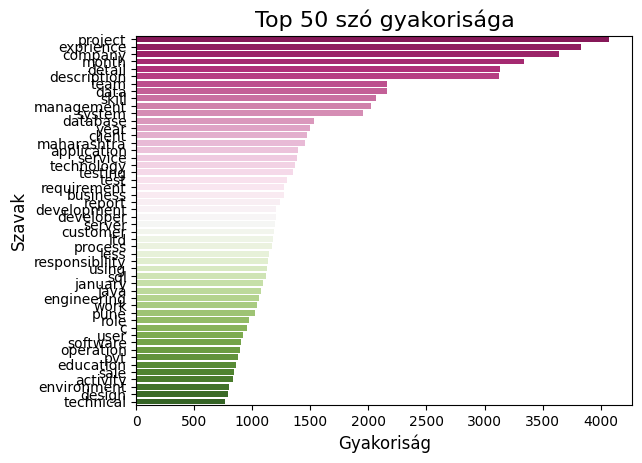

In [27]:
import seaborn as sns

sns.barplot(x="Frequency", y="Word", data=szo_gyak_df, palette="PiYG") # Spectral , viridis
plt.title(f"Top {top} szó gyakorisága", fontsize=16)
plt.xlabel("Gyakoriság", fontsize=12)
plt.ylabel("Szavak", fontsize=12)
plt.show()

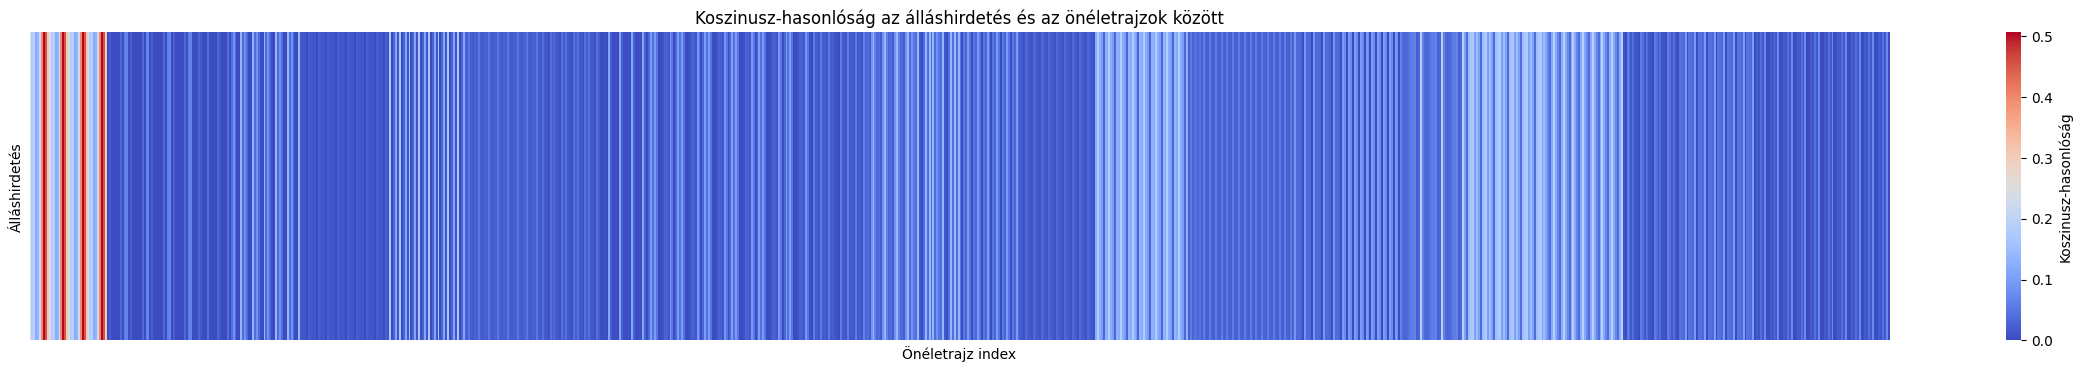

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(30, 4))
sns.heatmap(
    [similarity_scores],
    annot=False,
    cmap="coolwarm",
    xticklabels=False,
    yticklabels=False,
    cbar_kws={"label": "Koszinusz-hasonlóság"}
)
plt.title("Koszinusz-hasonlóság az álláshirdetés és az önéletrajzok között")
plt.xlabel("Önéletrajz index")
plt.ylabel("Álláshirdetés")
plt.show()


C:\Users\Évi\AppData\Local\Temp\ipykernel_2516\3219454154.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(len(similarity_scores))), y=similarity_scores, palette="coolwarm")


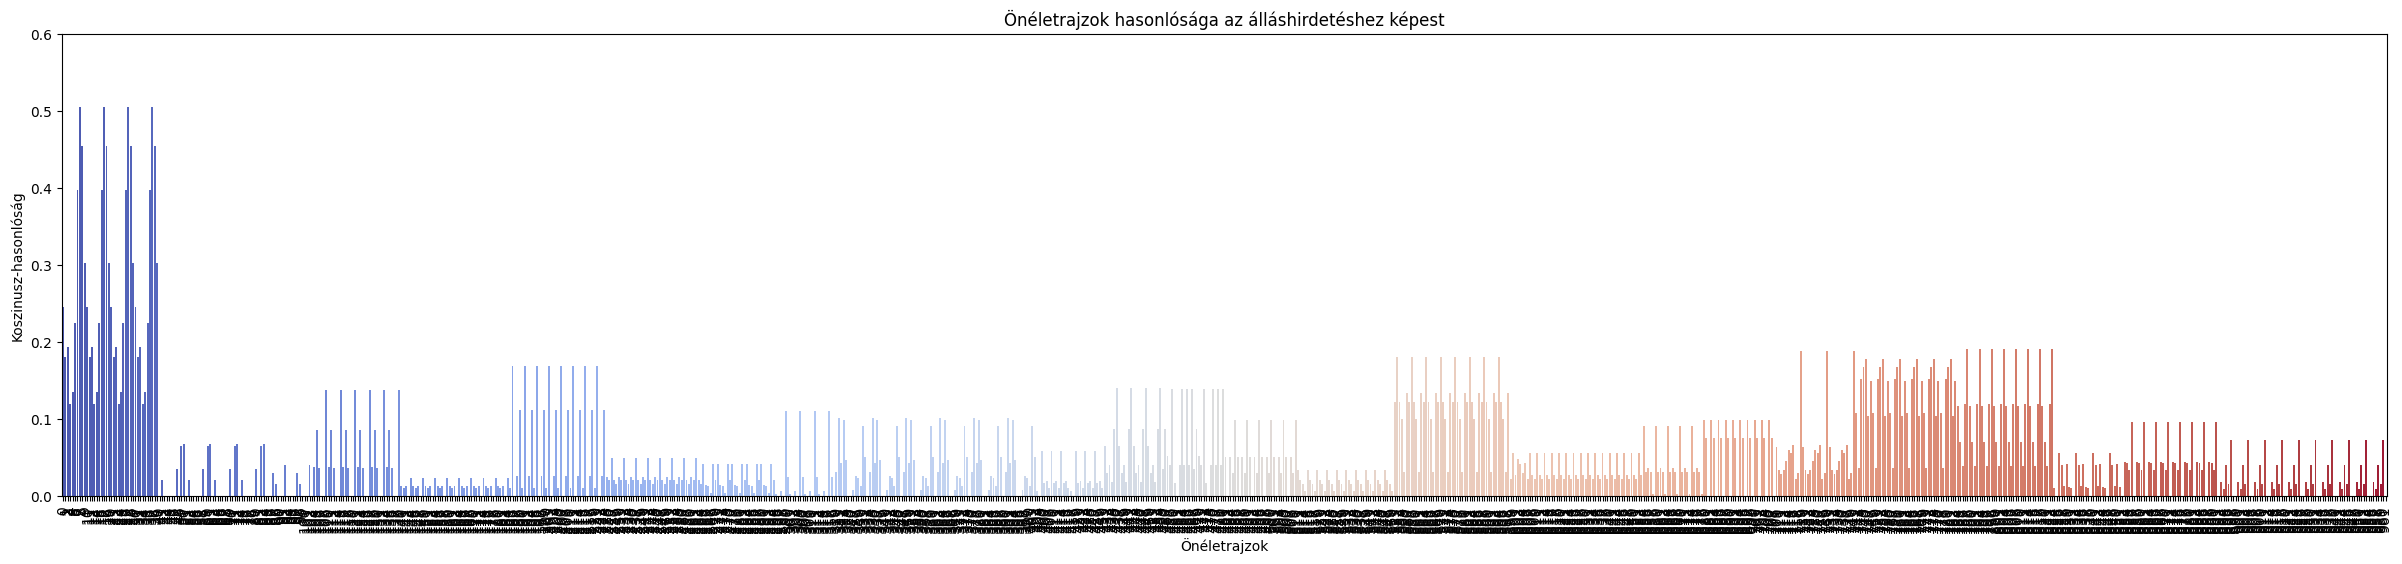

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 6))
sns.barplot(x=list(range(len(similarity_scores))), y=similarity_scores, palette="coolwarm")

plt.xlabel("Önéletrajzok")
plt.ylabel("Koszinusz-hasonlóság")
plt.title("Önéletrajzok hasonlósága az álláshirdetéshez képest")
plt.ylim(0, 0.6)
plt.xticks(rotation=90)
plt.show()
